In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold





In [202]:
data_df=pd.read_csv('PDFMalware2022.csv')
data_df.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [203]:
data_df.columns

Index(['Fine name', 'pdfsize', 'metadata size', 'pages', 'xref Length',
       'title characters', 'isEncrypted', 'embedded files', 'images', 'text',
       'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer',
       'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA',
       'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch',
       'EmbeddedFile', 'XFA', 'Colors', 'Class'],
      dtype='object')

In [204]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [205]:
data_df.nunique()

Fine name           10026
pdfsize               501
metadata size         402
pages                  88
xref Length           905
title characters      149
isEncrypted             6
embedded files          7
images                 89
text                    5
header                 50
obj                   479
endobj                478
stream                238
endstream             241
xref                   21
trailer                20
startxref              20
pageno                 96
encrypt                 4
ObjStm                 55
JS                     32
Javascript             35
AA                     40
OpenAction              8
Acroform               10
JBIG2Decode            16
RichMedia               7
launch                  5
EmbeddedFile           19
XFA                     7
Colors                 62
Class                   2
dtype: int64

# Data clearning

In [206]:
data_df.isna().sum()

Fine name           0
pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [207]:
data_df.dropna(inplace=True)

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [209]:
label_encoder = LabelEncoder()
categorical_columns = data_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_df[col] = label_encoder.fit_transform(data_df[col])


In [210]:
for i in data_df:
    data_df[i]= data_df[i].replace(-1, 1)

In [211]:
data_df.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,6911,8.0,180.0,1.0,11.0,0.0,0.0,0.0,1,2,...,1,2,1,1,1,1,1,1,0.0,1
1,9963,15.0,224.0,0.0,20.0,7.0,0.0,0.0,1,2,...,1,1,2,1,1,1,17,2,0.0,1
2,3376,4.0,468.0,2.0,13.0,16.0,0.0,0.0,1,3,...,1,2,1,1,1,1,1,1,0.0,1
3,4106,17.0,250.0,1.0,15.0,0.0,0.0,0.0,1,2,...,1,2,2,1,1,1,1,1,0.0,1
4,8962,7.0,252.0,3.0,16.0,45.0,0.0,0.0,1,3,...,1,2,1,1,1,1,1,1,0.0,1


In [212]:

x = data_df.drop(columns=['Class'])
y = data_df['Class']
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [213]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((8018, 32), (8018,), (2005, 32), (2005,))

# EDA

In [214]:
data_df['Class'].value_counts()

Class
1    5555
0    4468
Name: count, dtype: int64

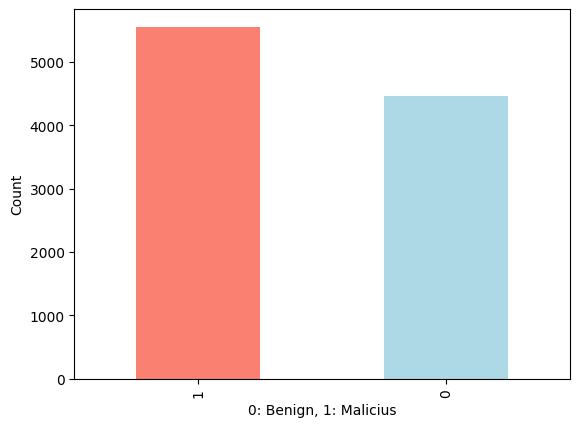

In [15]:
data_df['Class'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: Benign, 1: Malicius')
plt.ylabel('Count');

<Axes: xlabel='text', ylabel='count'>

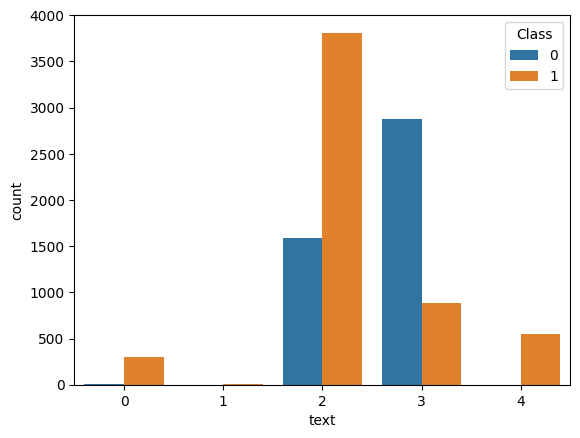

In [16]:
sns.countplot(data=data_df, x='text', hue = 'Class')

<Axes: xlabel='encrypt', ylabel='count'>

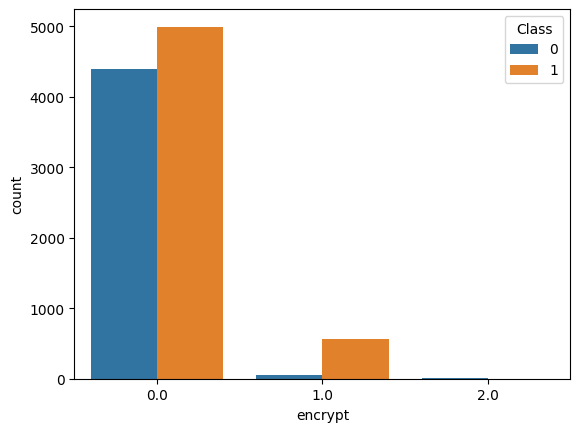

In [17]:
sns.countplot(data=data_df, x='encrypt', hue = 'Class')

(0.0, 2000.0)

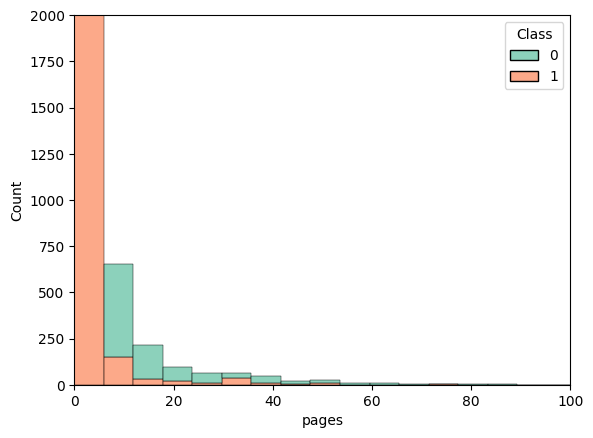

In [18]:
sns.histplot(data=data_df, x=data_df['pages'], bins=100,hue='Class', multiple='stack', palette='Set2');
plt.xlim(0, 100)
plt.ylim(0, 2000)

In [19]:
cereal_corr = data_df.corr()
cereal_corr

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
Fine name,1.000000,0.004811,-0.005265,-0.006358,0.005677,0.001390,0.005821,0.016343,0.002178,-0.005805,...,-0.011494,-0.000472,-0.005767,-0.020188,-0.018524,-0.017445,-0.003356,-0.011656,0.004714,0.011671
pdfsize,0.004811,1.000000,-0.000224,0.110356,-0.010103,-0.002402,0.048535,0.040083,0.089841,0.062870,...,-0.001761,-0.032280,-0.007943,-0.009968,-0.054058,-0.059317,-0.011917,-0.039677,0.024297,-0.042967
metadata size,-0.005265,-0.000224,1.000000,-0.007507,-0.012096,0.864292,-0.032962,-0.031894,-0.004804,0.017924,...,-0.001629,0.029706,0.005211,0.000331,0.016345,0.002668,0.016999,0.007434,-0.000734,0.009102
pages,-0.006358,0.110356,-0.007507,1.000000,-0.024356,-0.007453,0.026932,0.033498,0.057618,0.142307,...,-0.009055,-0.050354,-0.032831,0.005249,-0.011166,-0.013743,-0.003671,-0.012958,0.162733,-0.122537
xref Length,0.005677,-0.010103,-0.012096,-0.024356,1.000000,-0.005432,-0.028201,-0.031487,-0.043516,-0.060531,...,-0.010507,0.069934,-0.023285,-0.007492,0.008262,0.006920,-0.012409,0.007385,-0.001381,0.123351
title characters,0.001390,-0.002402,0.864292,-0.007453,-0.005432,1.000000,-0.006616,-0.007756,-0.009377,-0.011993,...,-0.002162,0.021510,-0.005194,-0.000978,0.018322,0.003769,0.010093,0.008864,-0.000705,0.025273
isEncrypted,0.005821,0.048535,-0.032962,0.026932,-0.028201,-0.006616,1.000000,0.668206,-0.028600,-0.499126,...,0.033109,0.043824,-0.031584,-0.028552,-0.015238,-0.018120,-0.004655,0.016074,0.021079,0.125977
embedded files,0.016343,0.040083,-0.031894,0.033498,-0.031487,-0.007756,0.668206,1.000000,-0.038380,-0.403345,...,0.019866,0.048989,-0.048912,-0.035358,-0.033297,-0.031123,-0.006000,-0.002679,0.013553,0.186970
images,0.002178,0.089841,-0.004804,0.057618,-0.043516,-0.009377,-0.028600,-0.038380,1.000000,0.030146,...,-0.014779,-0.115383,-0.020461,0.151456,0.006153,0.002709,-0.060692,-0.031759,-0.008198,-0.263903
text,-0.005805,0.062870,0.017924,0.142307,-0.060531,-0.011993,-0.499126,-0.403345,0.030146,1.000000,...,-0.003688,-0.121142,0.085296,0.007223,-0.080454,-0.092433,0.048657,-0.106668,0.002548,-0.268160


In [20]:

ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

mask = np.triu(ones_corr)
mask

adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = cereal_corr.iloc[1:,:-1]

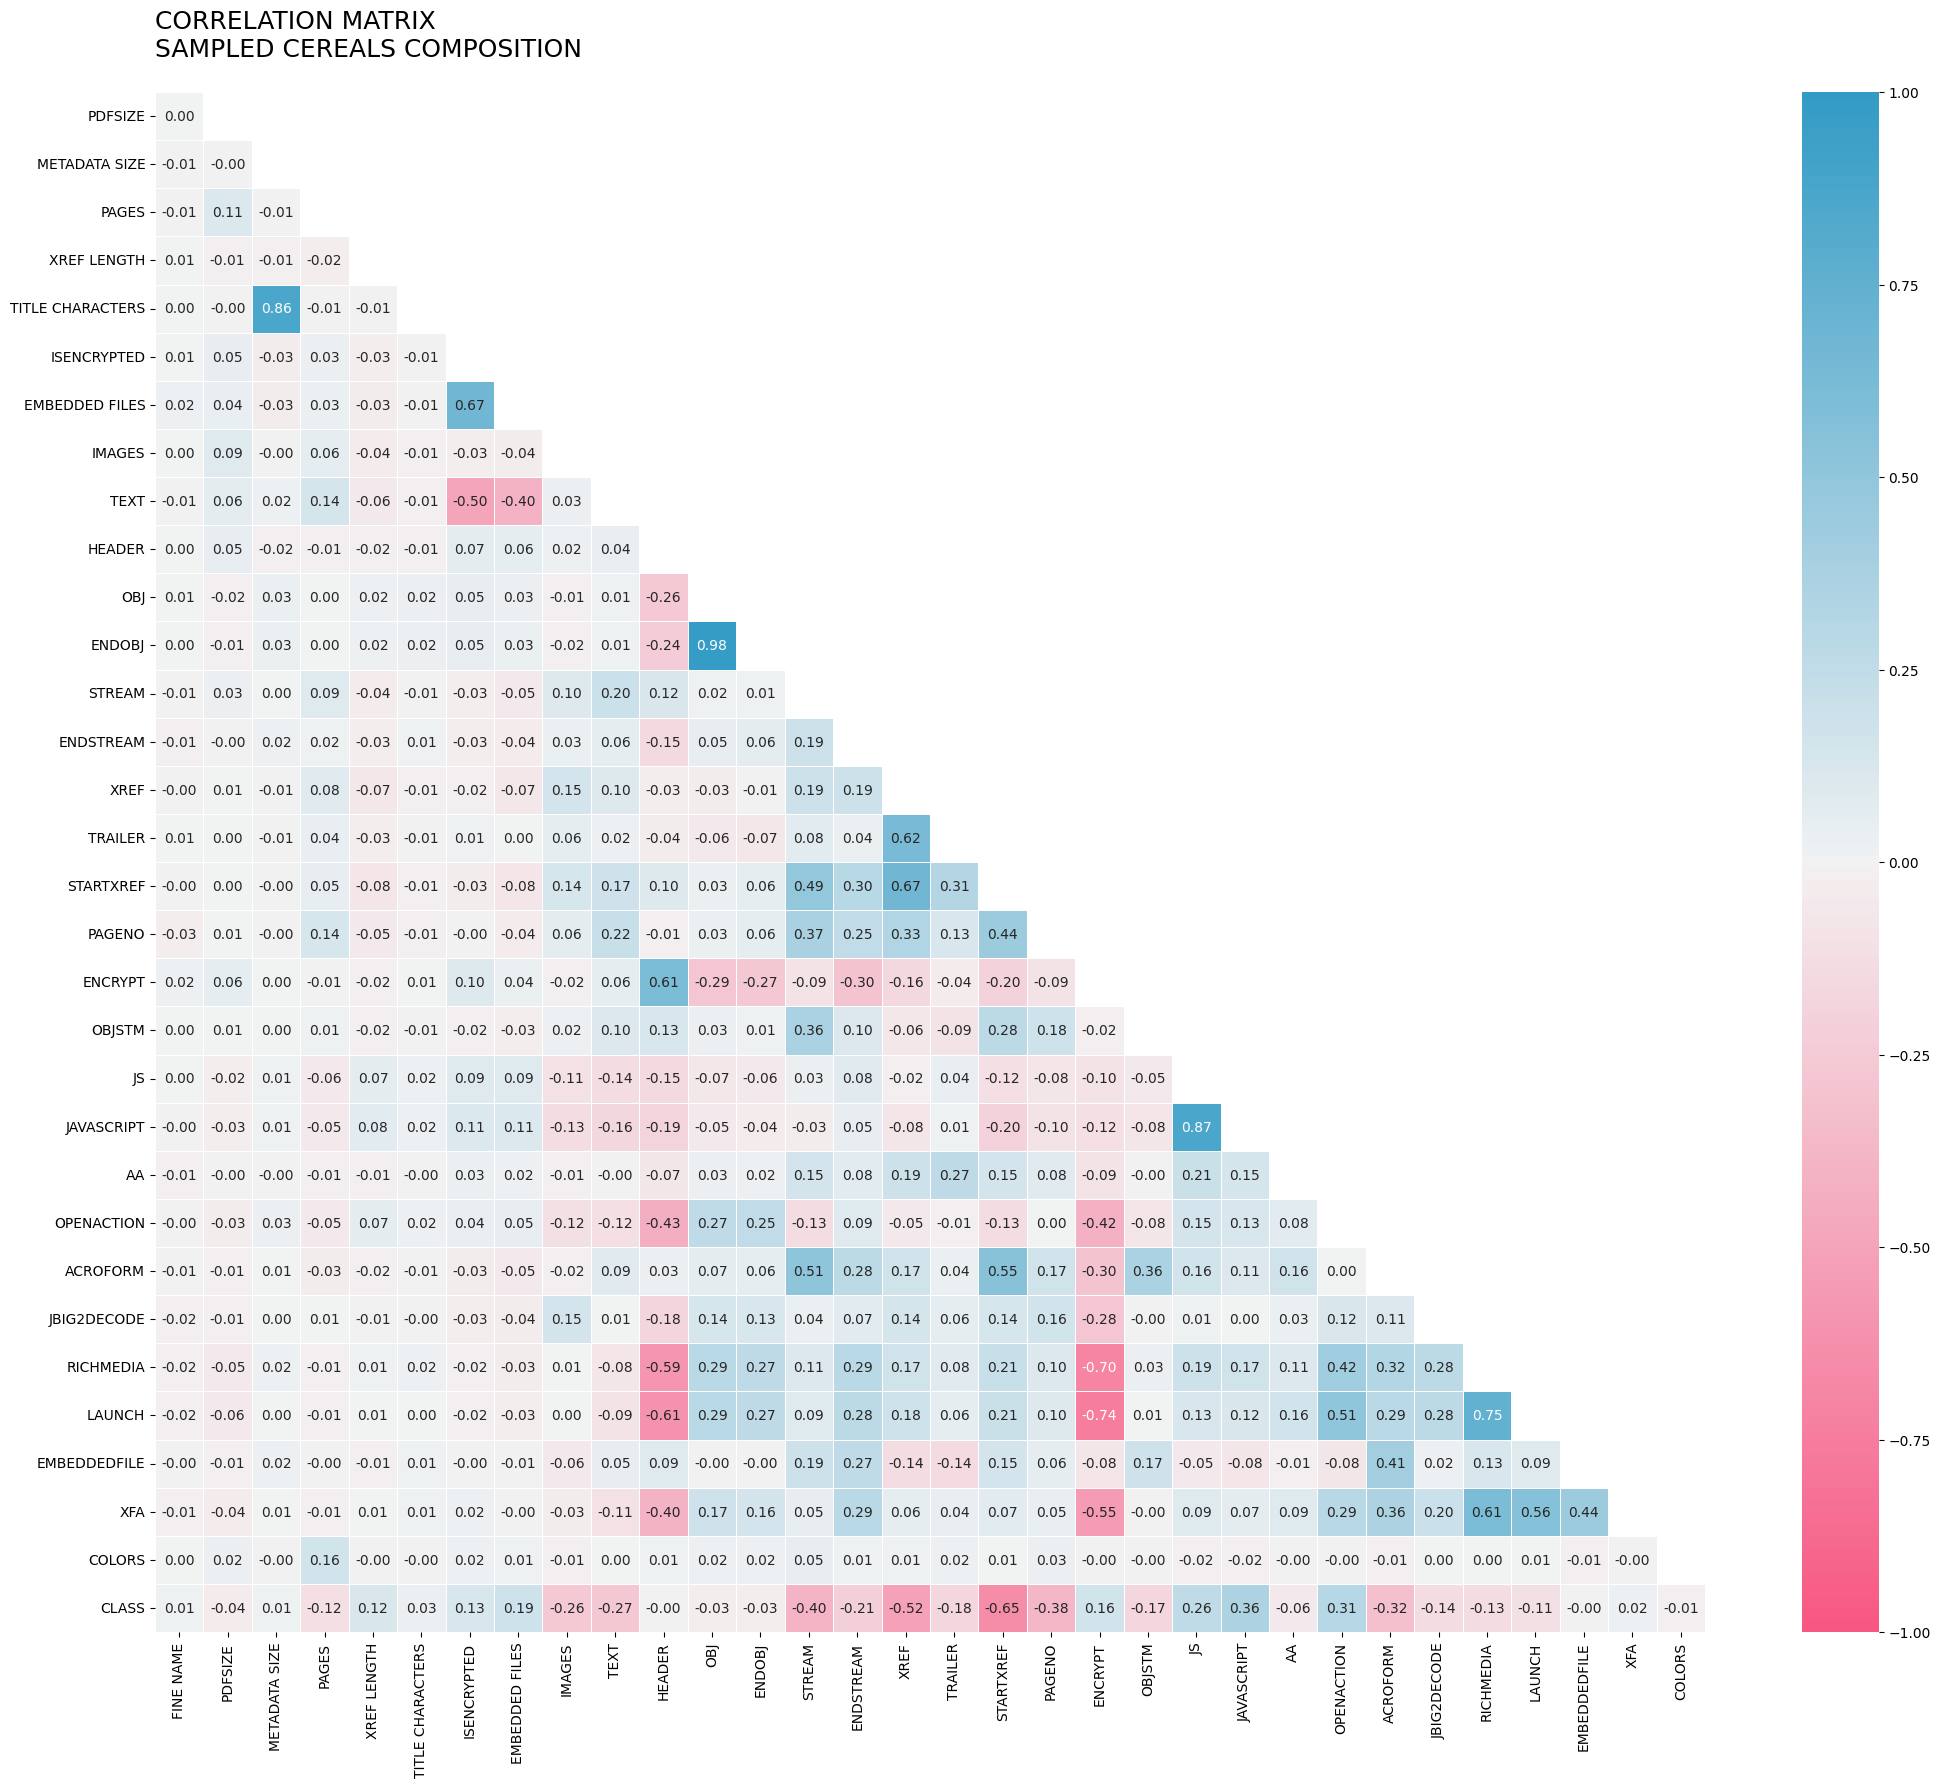

In [21]:
fig, ax = plt.subplots(figsize=(25, 20))

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(adjusted_cereal_corr, mask=adjusted_mask, 
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, #Colorbar max and min
            linecolor='white', linewidth=0.5);

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]
ax.set_yticklabels(yticks, rotation=0)
ax.set_xticklabels(xticks, rotation=90)
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18);

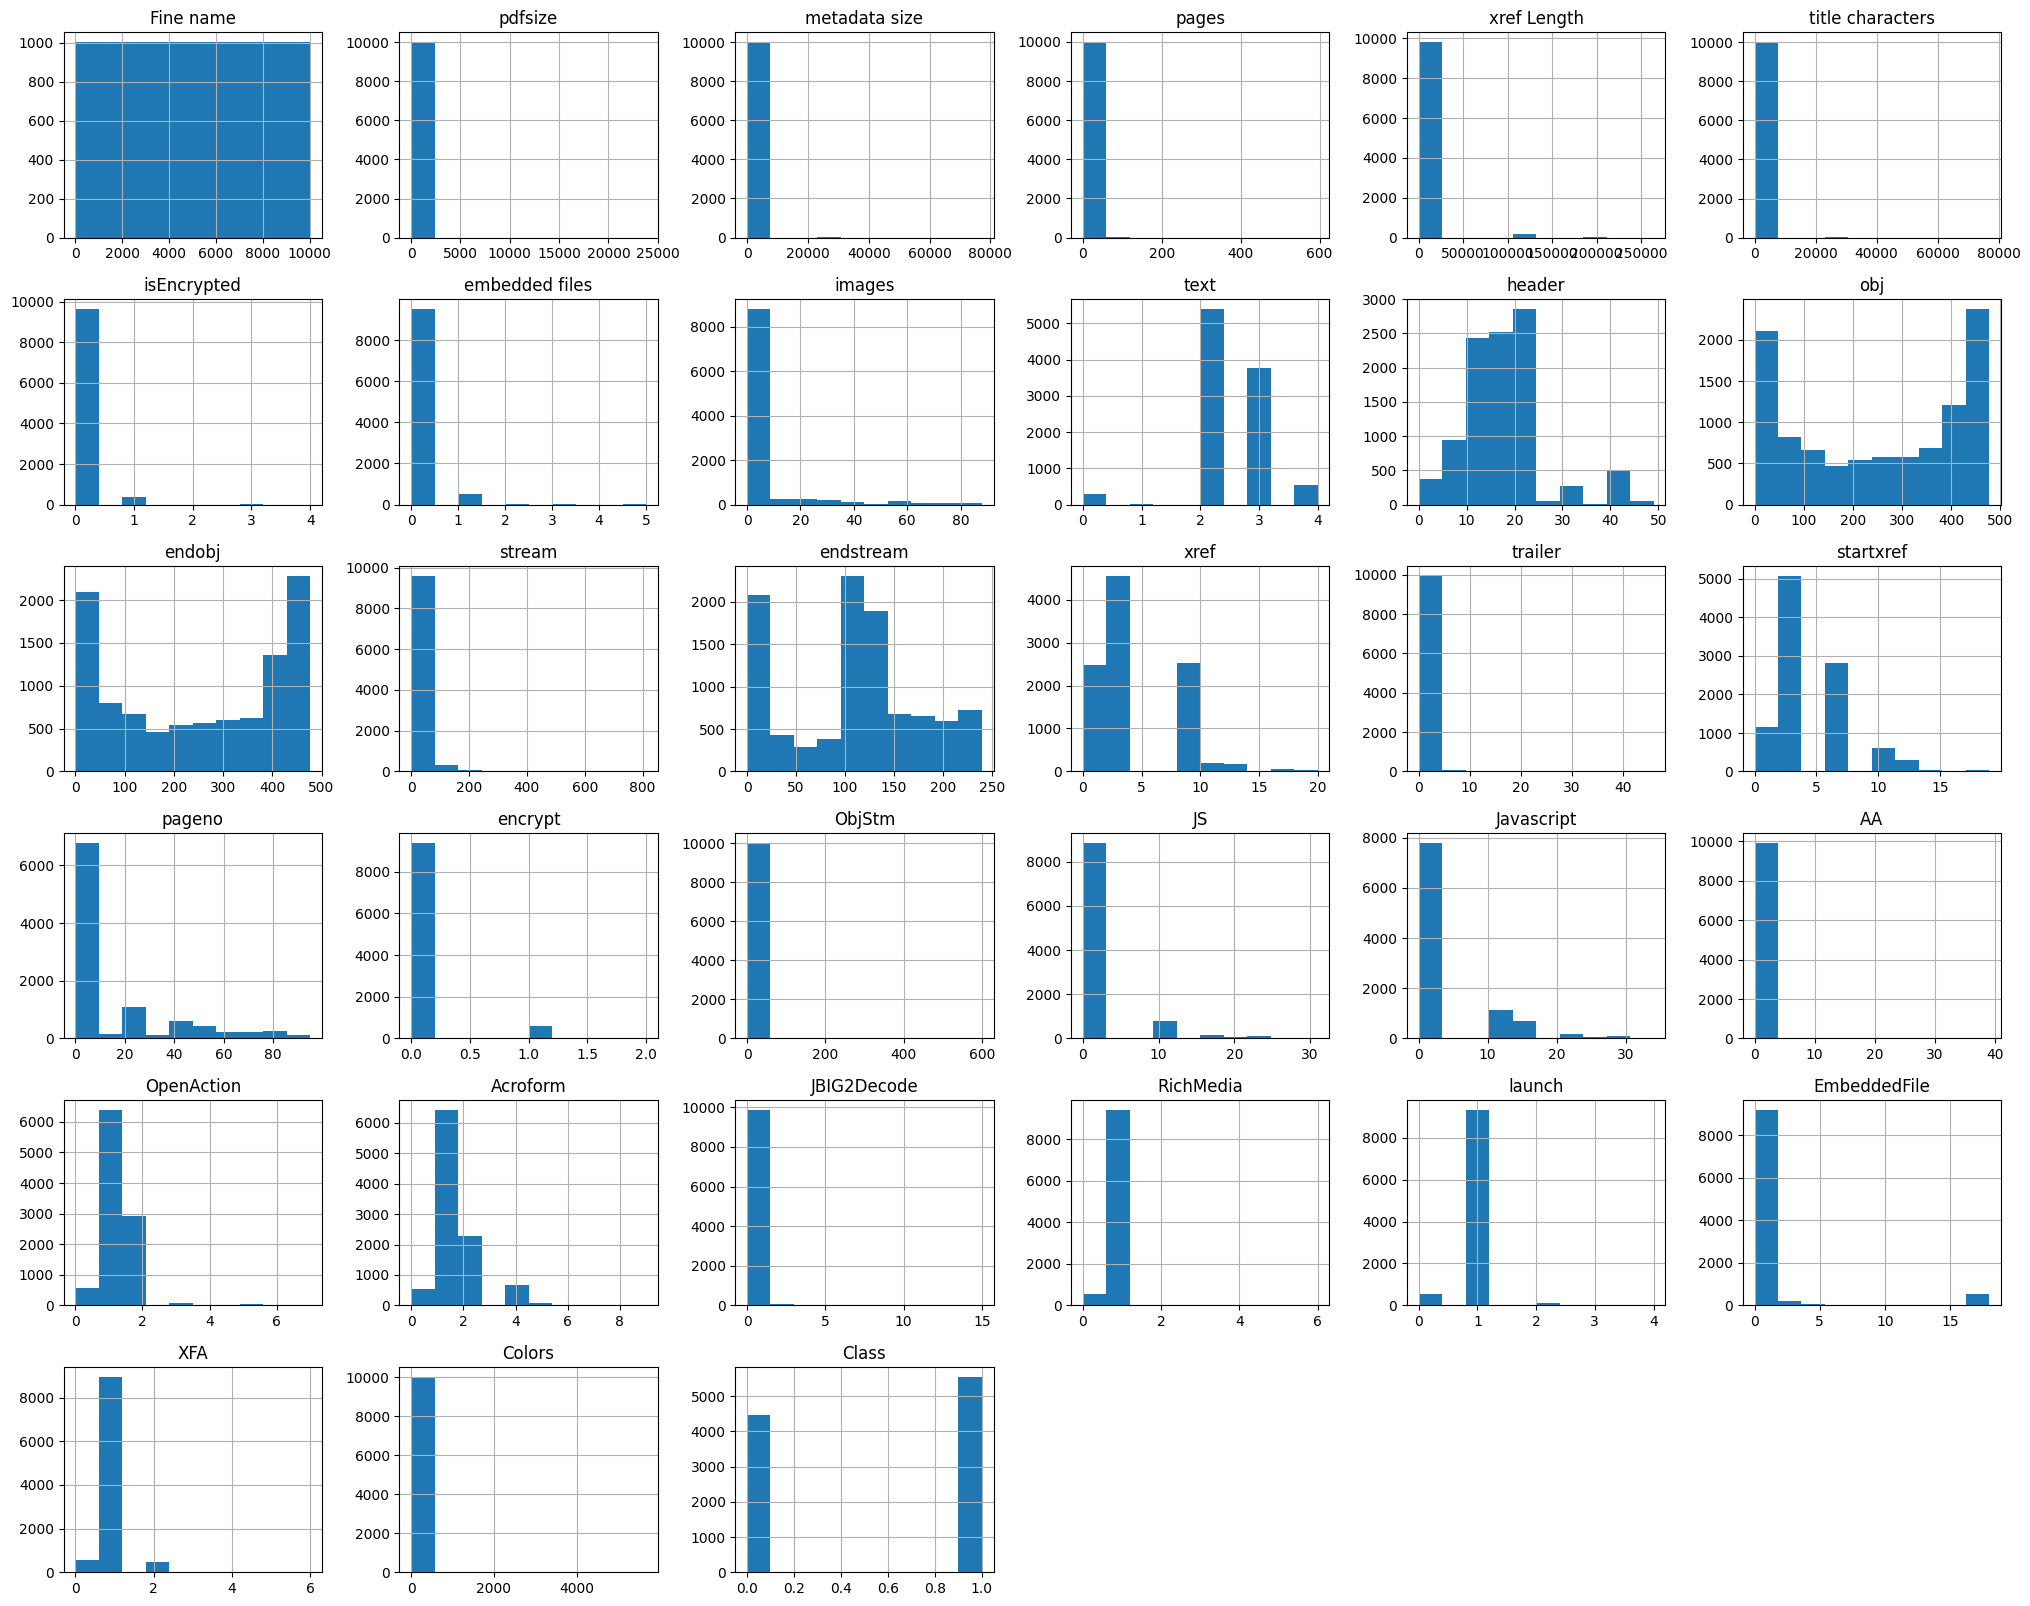

In [22]:
data_df.hist(figsize=(25,20),bins = 10)
plt.title("Features Distribution")
plt.show()

# 1.Model training

In [215]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifer': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# create function to fit and score model
def fit_and_score(models, x_train,  y_train):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and sco
    # re
    for model_name, model in models.items():
        scores = cross_val_score(model, x_train, y_train, cv=k_fold)
        score = scores.mean()
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [216]:
model_scores = fit_and_score(models, x_train, y_train)

model_scores

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

{'LogisticRegression': 0.9095773510702345,
 'RandomForestClassifer': 0.9936398087750057,
 'DecisionTreeClassifier': 0.9846588301548064}

In [237]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,RandomForestClassifer,DecisionTreeClassifier
accuracy,0.909577,0.99364,0.984659


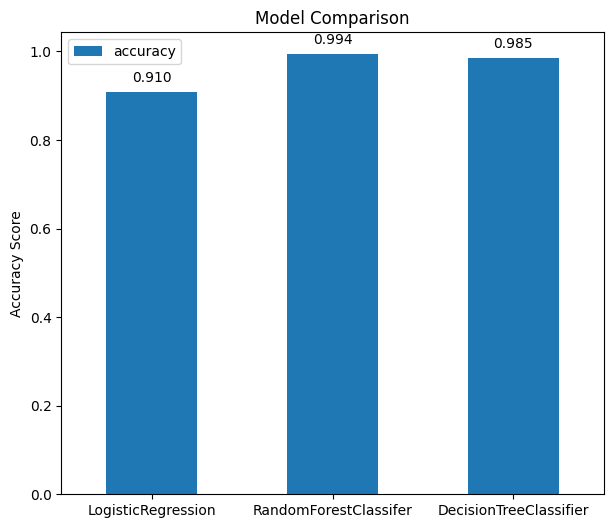

In [238]:
model_compare_transposed = model_compare.T
fig, ax = plt.subplots(figsize=(7, 6))

# Plotting the transposed DataFrame
model_compare_transposed.plot(kind='bar', rot=0, ax=ax)

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set title and axis labels
plt.title('Model Comparison')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()

# 2.Logistic Regression

### 2.1. Feature importance

In [217]:
x = data_df.drop(columns=['Class'])
y = data_df['Class']

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)


In [218]:
model = LogisticRegression(max_iter=1000)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=k_fold)
scores

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

array([0.9127182 , 0.91521197, 0.909601  , 0.90143481, 0.90892077])

In [219]:
scores.mean()

0.9095773510702345

In [220]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [221]:
# check Coefficient of features
coef_values=model.coef_

In [222]:
feature_dict = dict(zip(data_df.columns, list(model.coef_[0])))

feature_dict

{'Fine name': 2.8936244533747247e-05,
 'pdfsize': -0.00013631098264154206,
 'metadata size': -4.140466078149572e-05,
 'pages': -0.004889791943546265,
 'xref Length': 9.764526187662724e-05,
 'title characters': 0.00017121317961673173,
 'isEncrypted': 0.01745872672130279,
 'embedded files': 0.02927816683316679,
 'images': -0.039165252088183874,
 'text': -0.047494819196441516,
 'header': 0.08916517879570407,
 'obj': -0.009582646743738151,
 'endobj': 0.010710647172608643,
 'stream': -0.10120045816143146,
 'endstream': 0.00037962979001702037,
 'xref': -0.27451111903161346,
 'trailer': 0.027901519305694095,
 'startxref': -0.16883275255402191,
 'pageno': -0.00808575289417594,
 'encrypt': 0.0023095177333923543,
 'ObjStm': 0.0568968871434576,
 'JS': 0.09711429364657591,
 'Javascript': 0.22130642955780583,
 'AA': 0.0050729206780140024,
 'OpenAction': 0.1302082760314737,
 'Acroform': -0.03235590417479888,
 'JBIG2Decode': -0.0030094013496394347,
 'RichMedia': 0.010071602818451117,
 'launch': 0.016

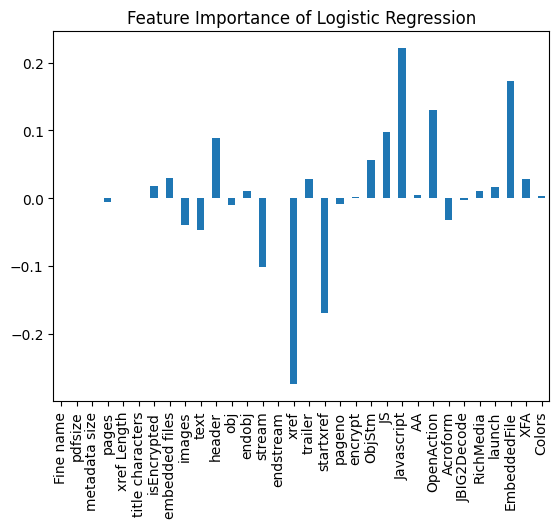

In [223]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False);

In [224]:

coef_values = model.coef_[0]
feature_names = data_df.columns[:-1]  
feature_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_values})


#### Lấy ngưỡng 0.1

In [225]:
threshold = 0.1 # ngưỡng 0.1  
features_lg_1 = feature_df.loc[feature_df['Coefficient'].abs() > threshold, 'Feature']
print("Selected Features:")
print(features_lg_1)

Selected Features:
13          stream
15            xref
17       startxref
22      Javascript
24      OpenAction
29    EmbeddedFile
Name: Feature, dtype: object


In [226]:
x=data_df[features_lg_1]

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [227]:
model = LogisticRegression(max_iter=1000)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=k_fold)
scores


array([0.88965087, 0.88902743, 0.89276808, 0.87897692, 0.89644417])

In [228]:
scores.mean()

0.8893734939009308

#### ngưỡng 0.05

In [229]:
threshold = 0.05 # ngưỡng 0.05
features_lg_2 = feature_df.loc[feature_df['Coefficient'].abs() > threshold, 'Feature']
print("Selected Features:")
print(features_lg_2)

Selected Features:
10          header
13          stream
15            xref
17       startxref
20          ObjStm
21              JS
22      Javascript
24      OpenAction
29    EmbeddedFile
Name: Feature, dtype: object


In [230]:
x=data_df[features_lg_2]

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [231]:
model = LogisticRegression(max_iter=1000)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=k_fold)
scores


array([0.93765586, 0.93204489, 0.93640898, 0.92326887, 0.93449782])

In [232]:
scores.mean()

0.9327752826293592

## 2.2. Hyperparameter Tuning - using GridSearchCV

In [257]:
x=data_df[features_lg_2]

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [258]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
model_lg = GridSearchCV(LogisticRegression(max_iter=1000), 
                                          log_reg_grid, 
                                          cv=4, 
                                          verbose=True)
model_lg.fit(x_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [259]:
# get best parameters
model_lg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [260]:
model_lg.best_score_

0.9425045793699384

## Evaluating Models

In [261]:
# make predictions
test = x_test[features_lg_2]
y_preds= model_lg.predict(test)

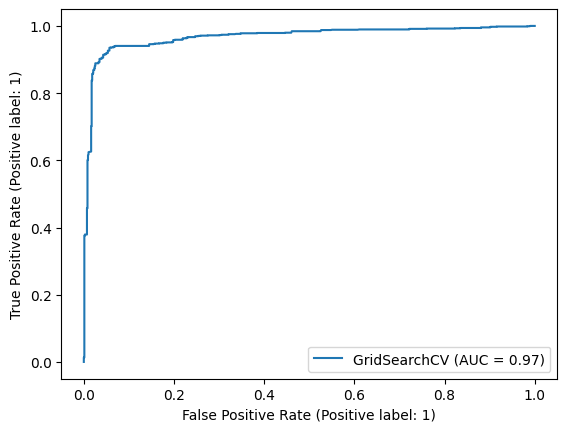

In [262]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model_lg, x_test, y_test)

In [263]:
cm = confusion_matrix(y_test, y_preds, labels=model_lg.classes_)
cm

array([[ 813,   50],
       [  74, 1068]], dtype=int64)

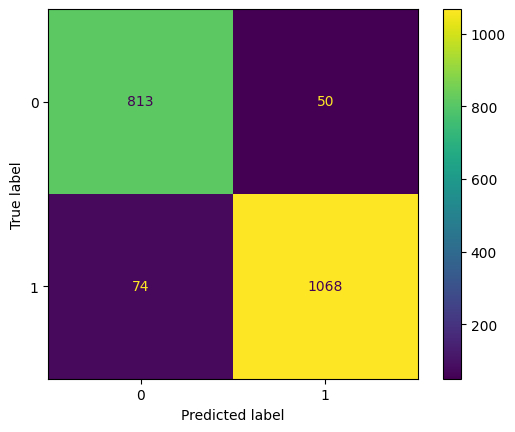

In [50]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lg.classes_)
disp.plot()

plt.show()

In [51]:
y_pred = model_lg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9381546134663342
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.96      0.94      0.95      1142

    accuracy                           0.94      2005
   macro avg       0.94      0.94      0.94      2005
weighted avg       0.94      0.94      0.94      2005



In [52]:
y_pred = model_lg.predict(x_test)
accuracy_lg = accuracy_score(y_test, y_pred)
precision_lg =  precision_score(y_test, y_pred)
recall_lg  = recall_score(y_test, y_pred)
f1_lg = f1_score(y_test, y_pred)
accuracy_lg, precision_lg, recall_lg, f1_lg

(0.9381546134663342,
 0.9552772808586762,
 0.9352014010507881,
 0.9451327433628318)

# 2.Random Forest

## 2.1. Features importance

In [150]:
x = data_df.drop(columns=['Class'])
y = data_df['Class']

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)


In [151]:
model = RandomForestClassifier()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier()

In [152]:
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.00224159 0.06217777 0.13675509 0.01606849 0.05489758 0.01048501
 0.0011343  0.00355985 0.03283083 0.02030676 0.02228214 0.01706302
 0.0258955  0.07993175 0.02131049 0.03563565 0.01729612 0.1159039
 0.03320336 0.00020985 0.00845256 0.09805693 0.09093024 0.00423413
 0.04428147 0.00889183 0.0003599  0.00252331 0.00243031 0.00783884
 0.01490782 0.00790362]


In [153]:

# Create a dictionary mapping feature names to their importances
feature_dict = dict(zip(data_df.columns, feature_importances))

# Print the dictionary
print("Feature Importances:", feature_dict)


Feature Importances: {'Fine name': 0.002241592964613881, 'pdfsize': 0.062177767715968606, 'metadata size': 0.13675508623011165, 'pages': 0.016068490141828703, 'xref Length': 0.054897584861913984, 'title characters': 0.010485011746617263, 'isEncrypted': 0.0011342999555568943, 'embedded files': 0.003559851304095337, 'images': 0.032830832229098245, 'text': 0.020306762819793572, 'header': 0.02228213917091644, 'obj': 0.01706302032832861, 'endobj': 0.025895502636654022, 'stream': 0.07993175146289586, 'endstream': 0.02131048844027685, 'xref': 0.03563565220547791, 'trailer': 0.017296116787069677, 'startxref': 0.11590390087499151, 'pageno': 0.03320336018821757, 'encrypt': 0.0002098506680181744, 'ObjStm': 0.008452555885048023, 'JS': 0.098056925910348, 'Javascript': 0.09093024473634267, 'AA': 0.004234130522261879, 'OpenAction': 0.044281467672347294, 'Acroform': 0.008891826281276891, 'JBIG2Decode': 0.00035989514472804183, 'RichMedia': 0.0025233110534859013, 'launch': 0.0024303056850040177, 'Embedd

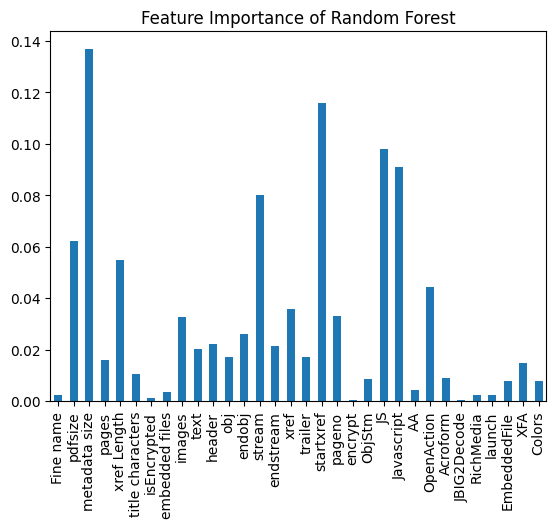

In [154]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Random Forest', legend=False);

In [155]:
feature_importances=feature_dict

#### chọn ngưỡng 0.01

In [156]:

# Chọn một ngưỡng quan trọng
threshold = 0.01
# Lựa chọn các đặc trưng quan trọng
features_rf_1 = [feature for feature, importance in feature_importances.items() if importance >= threshold]

In [158]:
features_rf_1

['pdfsize',
 'metadata size',
 'pages',
 'xref Length',
 'title characters',
 'images',
 'text',
 'header',
 'obj',
 'endobj',
 'stream',
 'endstream',
 'xref',
 'trailer',
 'startxref',
 'pageno',
 'JS',
 'Javascript',
 'OpenAction',
 'XFA']

In [159]:
x = x[features_rf_1]
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [167]:
model_rf_fi = RandomForestClassifier()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_rf_fi, x_train, y_train, cv=k_fold)
scores.mean()

0.9925168364180005

#### chọn ngưỡng 0.02

In [161]:
# Chọn một ngưỡng quan trọng
threshold = 0.02
# Lựa chọn các đặc trưng quan trọng
features_rf_2 = [feature for feature, importance in feature_importances.items() if importance >= threshold]

In [162]:
features_rf_2

['pdfsize',
 'metadata size',
 'xref Length',
 'images',
 'text',
 'header',
 'endobj',
 'stream',
 'endstream',
 'xref',
 'startxref',
 'pageno',
 'JS',
 'Javascript',
 'OpenAction']

In [163]:
x = x[features_rf_2]
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [172]:
model_rf_fi2 = RandomForestClassifier()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_rf_fi2, x_train, y_train, cv=k_fold)
scores.mean()

0.9935148093583882

Độ chính xác khi lấy ở mức 0.02 cao hơn --> chọn

## 2.2. Hyperparameter Tuning - using GridSearchCV

In [264]:
x = data_df[features_rf_2]
y = data_df['Class']

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)


In [174]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Instantiate the GridSearchCV object for Random Forest
model_grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the data
model_grid_rf.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [265]:

best_params_rf = model_grid_rf.best_params_
best_params_rf

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [269]:
print("Best cross-validation score: ", model_grid_rf.best_score_)
print("Best estimator: ", model_grid_rf.best_estimator_)

Best cross-validation score:  0.9938889519806224
Best estimator:  RandomForestClassifier(criterion='entropy')


In [248]:

model_rf = RandomForestClassifier(**best_params_rf)
model_rf.fit(x_train, y_train)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_rf, x_train, y_train, cv=k_fold)
scores.mean()

0.9936392642847031

## 2.3. Evaluating Models

In [272]:
y_preds=model_rf.predict(x_test)

In [273]:
cm = confusion_matrix(y_test, y_preds, labels=model_rf.classes_)
cm

array([[ 859,    4],
       [  10, 1132]], dtype=int64)

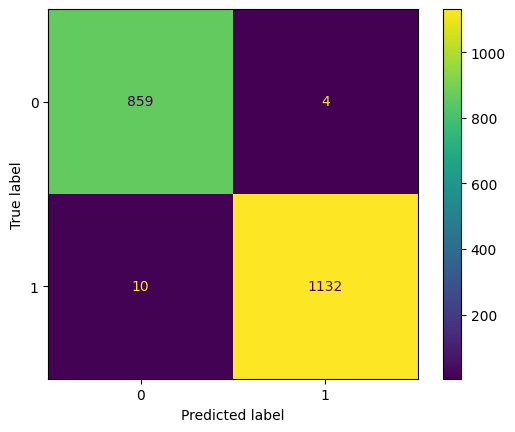

In [251]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_rf.classes_)
disp.plot()

plt.show()

In [252]:
y_pred = model_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9930174563591022
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       863
           1       1.00      0.99      0.99      1142

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



In [253]:
y_pred = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf =  precision_score(y_test, y_pred)
recall_rf  = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
accuracy_rf, precision_rf, recall_rf, f1_rf

(0.9930174563591022,
 0.9964788732394366,
 0.9912434325744308,
 0.9938542581211589)

# 3. Decision Tree

## 3.1. Feature Importance

In [77]:
x = data_df.drop(columns=['Class'])
y = data_df['Class']

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)


In [78]:
model = DecisionTreeClassifier()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=k_fold)
scores

array([0.98566085, 0.98753117, 0.98628429, 0.97878977, 0.9856519 ])

In [79]:
scores.mean()

0.9847835962184369

In [80]:
model  = DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [81]:
# Truy cập Feature Importance
feature_importances_dt = model.feature_importances_
feature_importances_dt

array([1.54151245e-05, 1.97688908e-02, 1.10843626e-01, 2.79608746e-03,
       4.72283147e-03, 8.10656309e-03, 0.00000000e+00, 9.97664633e-04,
       3.91206960e-03, 3.91133993e-03, 1.15462859e-01, 1.76046192e-03,
       4.88489020e-03, 2.91213949e-02, 5.81777764e-04, 3.36346104e-02,
       2.32223644e-03, 5.22736472e-01, 1.25747215e-03, 0.00000000e+00,
       2.00593514e-02, 9.20907412e-04, 9.72929021e-02, 0.00000000e+00,
       9.71991761e-04, 3.35997152e-04, 0.00000000e+00, 0.00000000e+00,
       3.97880277e-03, 7.72512748e-04, 3.03922891e-03, 5.79164303e-03])

In [82]:
# In ra Feature Importances
feature_dict_dt = dict(zip(data_df.columns, feature_importances_dt))
print("Feature Importances (Decision Tree):", feature_dict_dt)


Feature Importances (Decision Tree): {'Fine name': 1.5415124494081972e-05, 'pdfsize': 0.019768890762755773, 'metadata size': 0.11084362551204804, 'pages': 0.0027960874645942164, 'xref Length': 0.004722831465959458, 'title characters': 0.00810656309404128, 'isEncrypted': 0.0, 'embedded files': 0.000997664633155802, 'images': 0.003912069603539216, 'text': 0.0039113399253738875, 'header': 0.11546285928784511, 'obj': 0.00176046191788766, 'endobj': 0.004884890202808734, 'stream': 0.029121394874590388, 'endstream': 0.0005817777640227996, 'xref': 0.03363461035709412, 'trailer': 0.0023222364385889977, 'startxref': 0.5227364721138684, 'pageno': 0.0012574721511196727, 'encrypt': 0.0, 'ObjStm': 0.020059351368174713, 'JS': 0.0009209074116417175, 'Javascript': 0.0972929021467285, 'AA': 0.0, 'OpenAction': 0.0009719917614666863, 'Acroform': 0.0003359971521119409, 'JBIG2Decode': 0.0, 'RichMedia': 0.0, 'launch': 0.003978802771221788, 'EmbeddedFile': 0.0007725127477867624, 'XFA': 0.003039228914821187, '

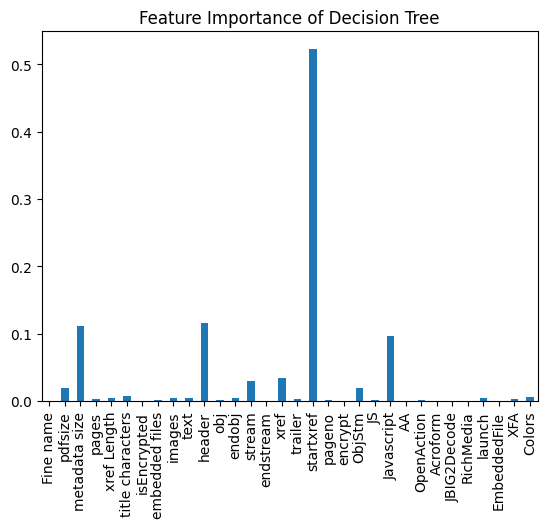

In [83]:
# Trực Quan Hóa Feature Importance
feature_df_dt = pd.DataFrame(feature_dict_dt, index=[0])
feature_df_dt.T.plot.bar(title='Feature Importance of Decision Tree', legend=False);


In [84]:
Feature_importance = feature_dict_dt


#### chọn ngưỡng 0.005

In [85]:

threshold_dt = 0.005

feature_dt_1 = [feature for feature, importance in feature_dict_dt.items() if importance >= threshold_dt]

In [86]:
feature_dt_1

['pdfsize',
 'metadata size',
 'title characters',
 'header',
 'stream',
 'xref',
 'startxref',
 'ObjStm',
 'Javascript',
 'Colors']

In [87]:
x = data_df[feature_dt_1]
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)


In [88]:
model = DecisionTreeClassifier()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=k_fold)
scores
scores.mean()

0.9839113227536274

#### ngưỡng 0.01

In [89]:


# Chọn một ngưỡng quan trọng (ví dụ: 0.02)
threshold_dt = 0.01

feature_dt_2 = [feature for feature, importance in feature_dict_dt.items() if importance >= threshold_dt]
feature_dt_2

['pdfsize',
 'metadata size',
 'header',
 'stream',
 'xref',
 'startxref',
 'ObjStm',
 'Javascript']

In [90]:
x = data_df[feature_dt_2]
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)


In [91]:
model = DecisionTreeClassifier()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=k_fold)
scores.mean()

0.9834118695774599

## 3.2. Hyperparameter Tuning - using GridSearchCV

In [274]:
x = data_df[feature_dt_1]
y = data_df['Class']

x_train, x_test, y_train, y_test =train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 1)


In [183]:
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
model_grid_dt= GridSearchCV(DecisionTreeClassifier(), 
                     dt_grid, 
                     cv=5,  
                     verbose=True)

# Huấn luyện mô hình Decision Tree
model_grid_dt.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'splitter': ['best', 'random']},
             verbose=True)

In [184]:
model_grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [185]:
model_grid_dt.best_score_

0.9872782952164194

In [186]:
model_grid_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy')

### Evaluating models

In [275]:
test=x_test[feature_dt_1]
# make predictions
y_pred = model_grid_dt.predict(test)

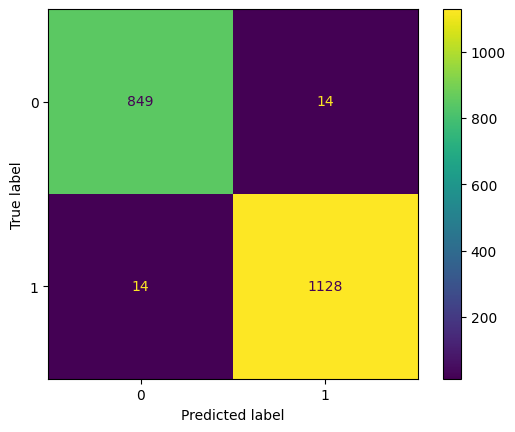

In [276]:
cm = confusion_matrix(y_test, y_pred, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_dt.classes_)
disp.plot()

plt.show()

In [277]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9860349127182045
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       863
           1       0.99      0.99      0.99      1142

    accuracy                           0.99      2005
   macro avg       0.99      0.99      0.99      2005
weighted avg       0.99      0.99      0.99      2005



In [102]:
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt =  precision_score(y_test, y_pred)
recall_dt  = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
accuracy_dt, precision_dt, recall_dt, f1_dt

(0.9855361596009975, 0.9860262008733625, 0.98861646234676, 0.9873196327066025)

In [103]:
# Cross Validated F1
cv_f1 = cross_val_score(model_dt, x_train, y_train, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.9872935067789449

In [255]:
data=np.array([
    [accuracy_lg ,precision_lg, recall_lg , f1_lg],
    [accuracy_rf,precision_rf, recall_rf,f1_rf ],
    [ accuracy_dt,precision_dt, recall_dt, f1_dt]
])
data

array([[0.93815461, 0.95527728, 0.9352014 , 0.94513274],
       [0.99301746, 0.99647887, 0.99124343, 0.99385426],
       [0.98553616, 0.9860262 , 0.98861646, 0.98731963]])

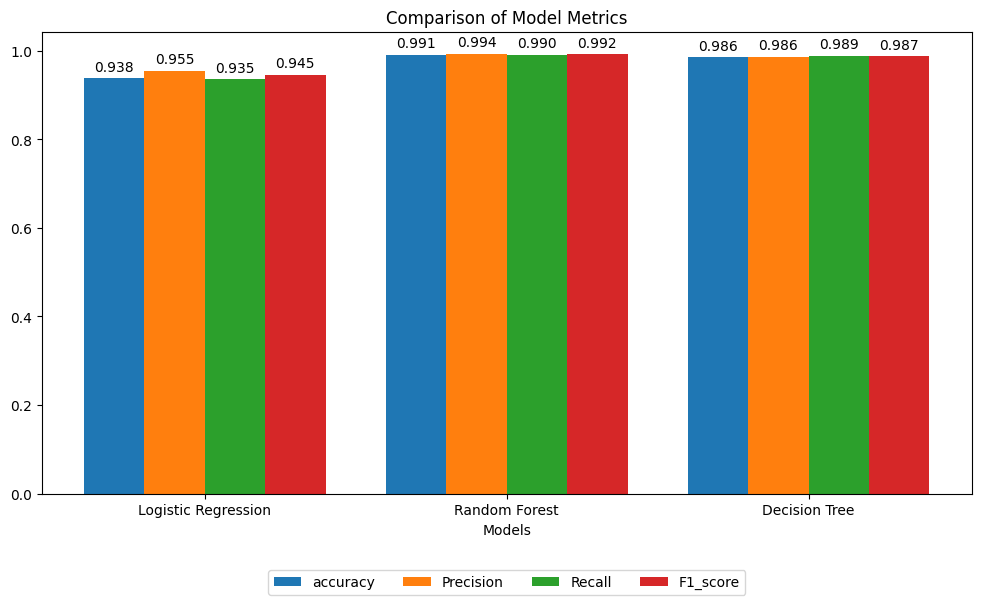

In [254]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have data for precision, recall, and F1_score for each model
data =data

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']
metrics = ['accuracy','Precision', 'Recall', 'F1_score']

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
bar_positions = np.arange(len(model_names))

for i in range(len(metrics)):
    bars = ax.bar(bar_positions + i * bar_width, data[:, i], width=bar_width, label=metrics[i])
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

ax.set_xticks(bar_positions + (len(metrics) - 1) * bar_width / 2)
ax.set_xticklabels(model_names)
ax.set_xlabel('Models')
ax.set_title('Comparison of Model Metrics')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(metrics))
plt.show()
